# CodeSoft : DataScience InternShip
# Task 02: Movie_ Rating_ Prediction
# Author : Haroon Sajid

_______________

- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

## 1.0 Importing Libraries

Pandas: Data manipulation and analysis library.
<br>Numpy: Numerical computing library.
<br>Matplotlib: Data visualization library.
<br>Seaborn: Statistical data visualization library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.0 Loading Dataset
In this section, We will import IMDb Movies Dataset

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 3.0 Basic Structure

In [3]:
# Lets check the shape of data
df.shape

(15509, 10)

In [4]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# Lets See unique values in all columns
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [6]:
# Lets See duplicate values in dataset
df.duplicated().sum()

6

## 4.0 Descriptive Statistics

In [7]:
# Lets See the statistics summary of dataset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
# Lets See the statistics summary of all columns
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


## 5.0 Identify Missing Values

In [9]:
# Lets See the missing values in dataset
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
#Percentage of missing values
df.isnull().sum() / len(df) * 100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

Text(0.5, 1.0, 'Missing null values')

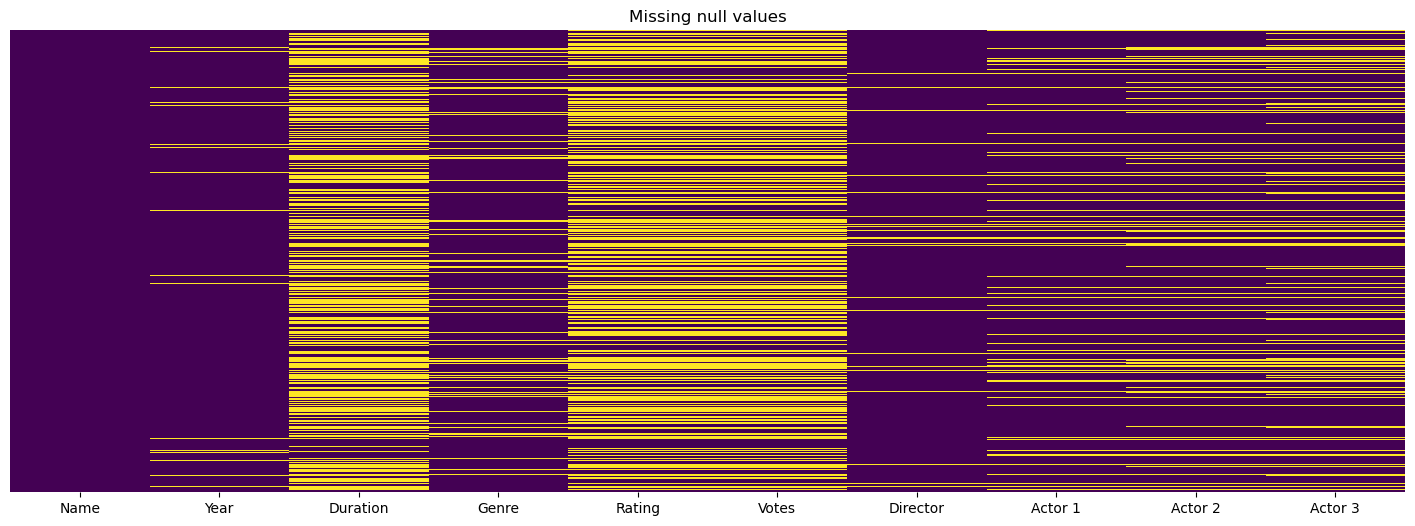

In [11]:
# Let's plot the missing null values
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

Figure_1: Shows the all missing values in dataset

## 6.0 Data Preprocessing and Exploration (EDA)

### 6.1 Data Cleaning

In [12]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
df.shape

(5659, 10)

In [16]:
# Remove parentheses from the 'year' column and min from Duration column
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace('min', '', regex=False)

In [17]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### 6.2 Data Exploration

In [18]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [19]:
import re
def extract_movie_name(movie_text):
    # Define a regular expression pattern to match movie names
    pattern = r'\b[A-Za-z][A-Za-z0-9\s\-&\(\):]+\b'
    match = re.search(pattern, movie_text)
    # Check if a match was found and return the matched text
    if match:
        return match.group(0)
    else:
        return None

# Assume df is your DataFrame and 'Name' is the column with movie names
df['Name'] = df['Name'].apply(extract_movie_name)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
# Lets See Top 10 Years based on of releasing in Dataset;
df_years = df['Year'].value_counts().reset_index().rename(columns={'index': 'Years', 'Year': 'Counts'}).head(10)
df_years

,Years,Counts
0,2019,227
1,2017,211
2,2018,202
3,2015,177
4,2016,173
5,2013,167
6,2014,165
7,2005,141
8,2012,140
9,2020,140


<Axes: xlabel='Years', ylabel='Counts'>

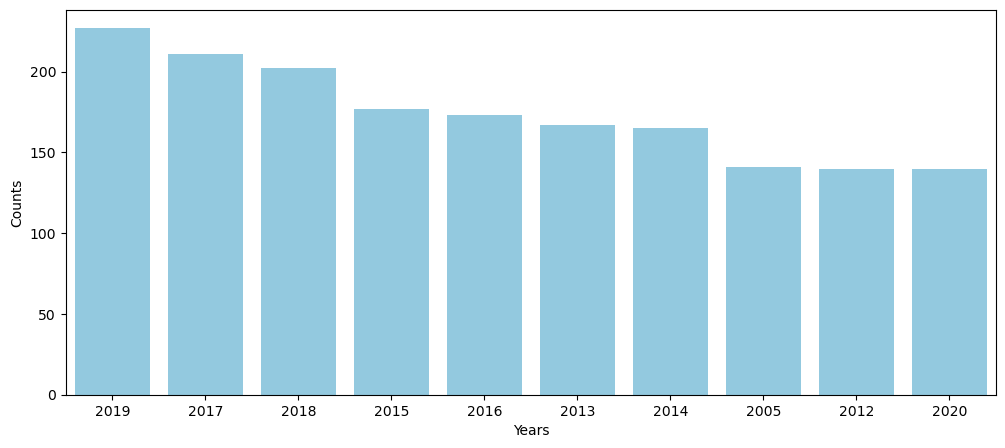

In [21]:
# Lets Create barplot to Show Top 10 Years based on of releasing movies;
plt.figure(figsize=(12,5))
sns.barplot(data = df_years, x = 'Years', y = 'Counts' , color='skyblue')

Figure_2: Show Top 10 Years based on of releasing movies.

In [22]:
# Lets See Top 10 Years based on no of releasing in Dataset;
df_years = df['Duration'].value_counts().reset_index().rename(columns={'index': 'Duration', 'Duration': 'Counts'}).head(10)
df_years

,Duration,Counts
0,120,169
1,135,147
2,130,141
3,150,133
4,140,133
5,137,120
6,145,116
7,136,113
8,138,111
9,139,105


In [23]:
df_years.describe()

,Counts
count,10.000000
mean,128.800000
std,19.736036
min,105.000000
25%,113.750000
50%,126.500000
75%,139.000000
max,169.000000


In [24]:
# Lets See Top 10 Directors in Dataset;
df['Rating'].value_counts().reset_index().rename(columns={'index': 'Rating', 'Rating': 'Counts'}).head(10)

,Rating,Counts
0,6.8,200
1,6.5,192
2,6.2,190
3,6.6,163
4,7.1,163
5,6.9,161
6,6.7,159
7,7.2,158
8,6.1,156
9,7.0,154


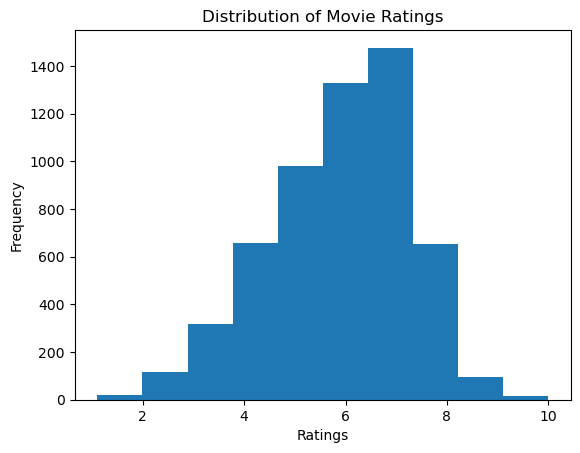

In [25]:
# Lets Create plot to See distribution of movie ratings
plt.hist(df['Rating'])
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Figure_3: Shows the distribution of movie ratings.

In [26]:
# Lets See counts in all Genre;
# genre_counts = df['Genre'].str.split(', ').explode().value_counts()
genre_counts = df['Genre'].str.get_dummies(', ').sum().head(10)
genre_counts

Action         1686
Adventure       277
Animation        40
Biography       115
Comedy         1344
Crime           875
Documentary      48
Drama          3796
Family          416
Fantasy         146
dtype: int64

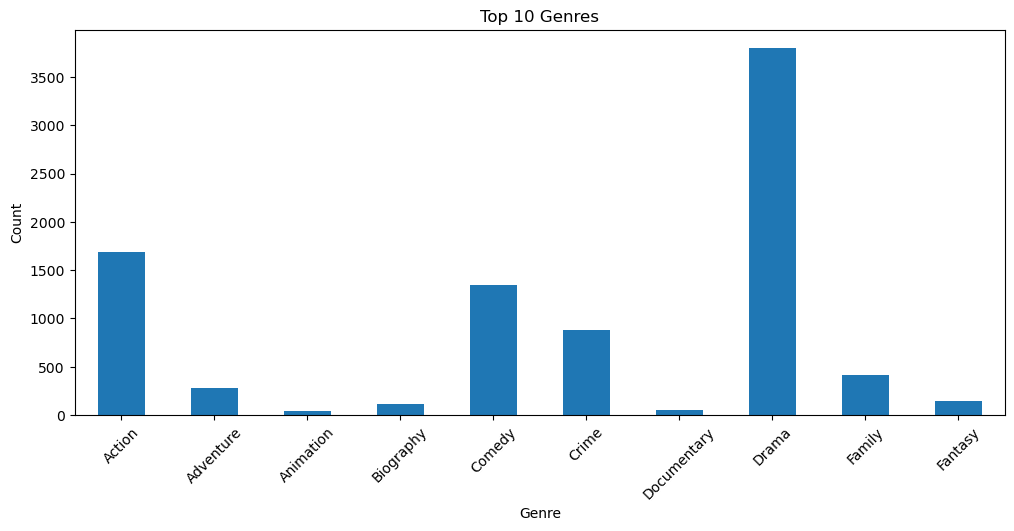

In [27]:
# Top 10 Categories
plt.figure(figsize=(12, 5))
genre_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Figure_4: Shows the Top 10 # Top 10 Categories.

In [28]:
# Lets See Top 10 Directors in Dataset;
df['Director'].value_counts().reset_index().head(10)

,index,Director
0,David Dhawan,41
1,Mahesh Bhatt,39
2,Ram Gopal Varma,33
3,Hrishikesh Mukherjee,33
4,Shakti Samanta,33
5,Vikram Bhatt,30
6,Priyadarshan,29
7,Basu Chatterjee,23
8,Rama Rao Tatineni,23
9,Shyam Benegal,22


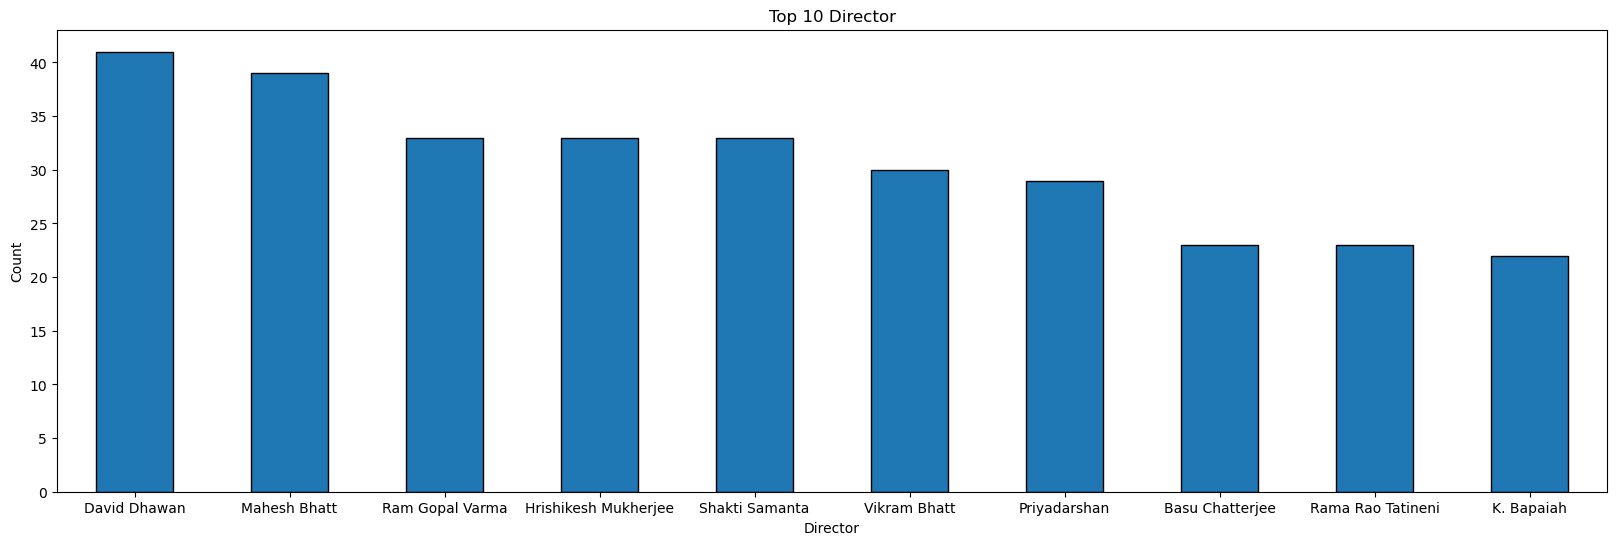

In [29]:
# Top 10 Director
df['Director'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
plt.xticks(rotation=0)
plt.title('Top 10 Director')
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()

Figure_5: Shows the Top 10 Directors.

In [30]:
# Lets See Top 10 Actor 1 in Dataset;
df['Actor 1'].value_counts().reset_index().head(10)

,index,Actor 1
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


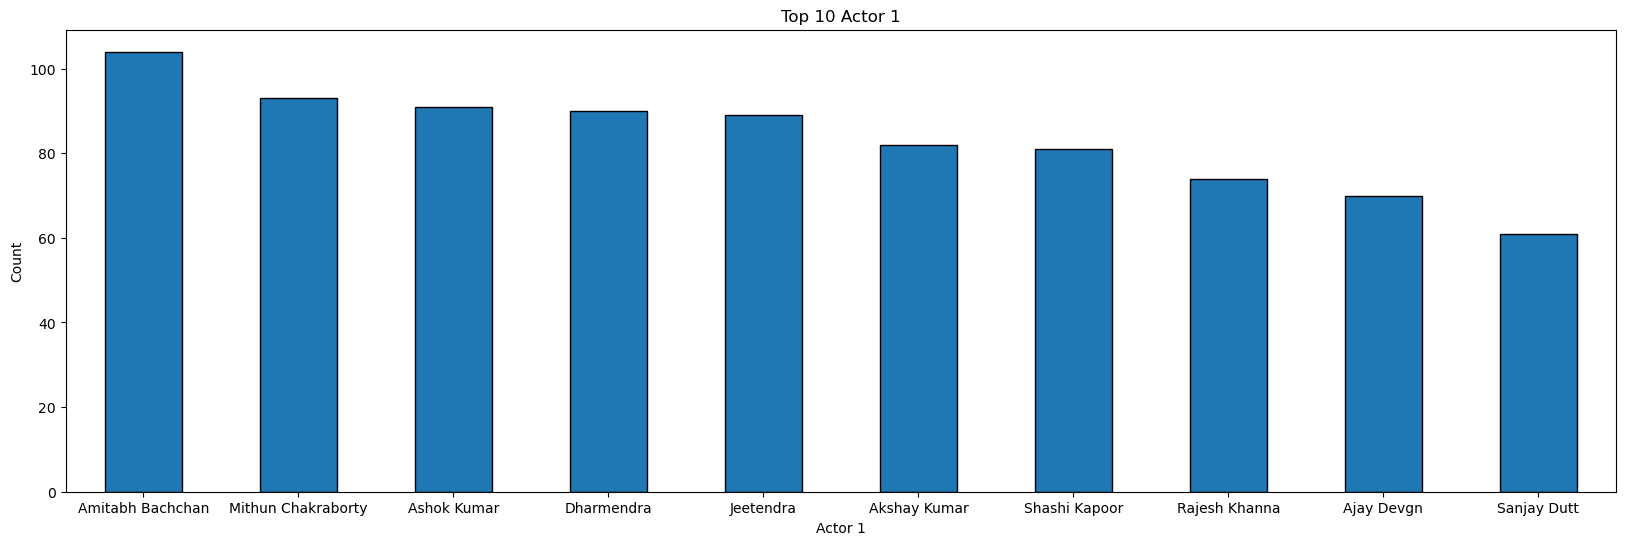

In [31]:
# Top 10 Actor 1
df['Actor 1'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
plt.xticks(rotation=0)
plt.title('Top 10 Actor 1')
plt.xlabel("Actor 1")
plt.ylabel("Count")
plt.show()

Figure_6: Shows the Top 10 Actor 1

In [32]:
# Lets See Top 10 Actor 2 in Dataset;
df['Actor 2'].value_counts().reset_index().head(10)

,index,Actor 2
0,Rekha,52
1,Hema Malini,48
2,Mithun Chakraborty,38
3,Dharmendra,38
4,Akshay Kumar,34
5,Juhi Chawla,34
6,Sharmila Tagore,32
7,Shabana Azmi,31
8,Raveena Tandon,28
9,Sunil Shetty,28


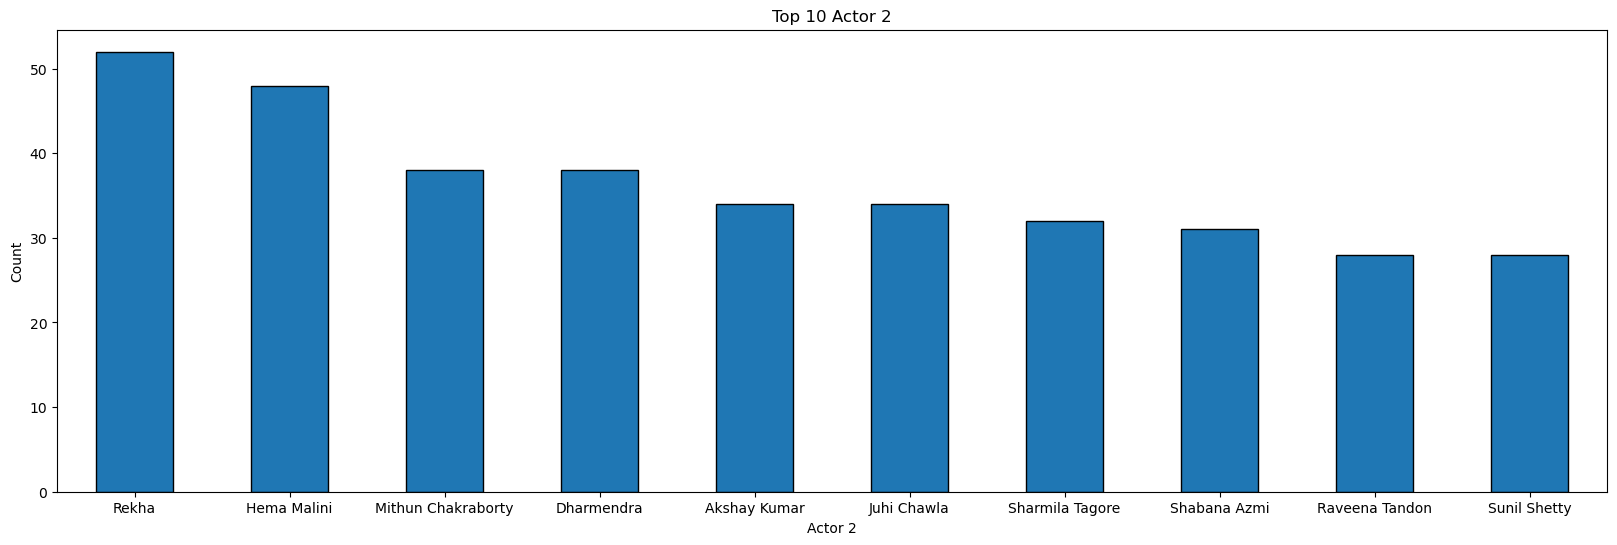

In [33]:
# Top 10 Actor 1
df['Actor 2'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
plt.xticks(rotation=0)
plt.title('Top 10 Actor 2')
plt.xlabel("Actor 2")
plt.ylabel("Count")
plt.show()

Figure_7: Shows the Top 10 Actor 2

In [34]:
# Lets See Top 10 Actor 3 in Dataset;
df['Actor 3'].value_counts().reset_index().head(10)

,index,Actor 3
0,Pran,57
1,Anupam Kher,51
2,Prem Chopra,32
3,Paresh Rawal,30
4,Mithun Chakraborty,29
5,Shatrughan Sinha,28
6,Amrish Puri,26
7,Om Puri,26
8,Asrani,26
9,Raj Babbar,24


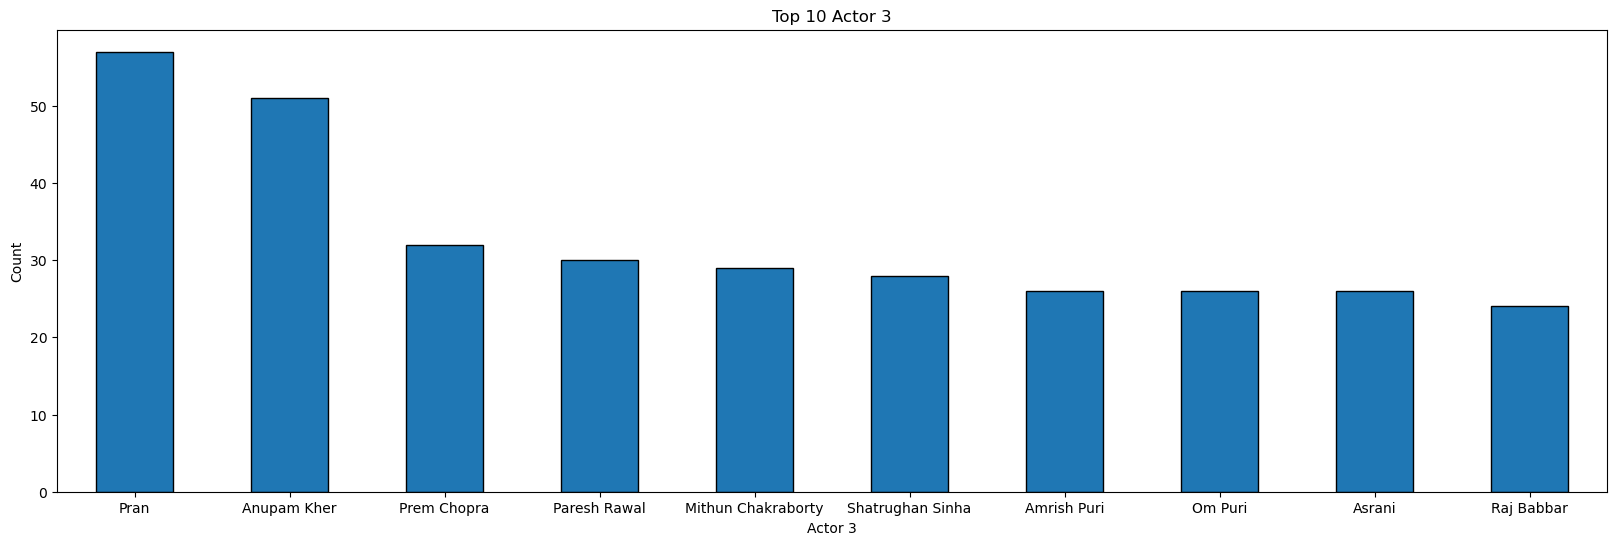

In [35]:
# Top 10 Actor 1
df['Actor 3'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
plt.xticks(rotation=0)
plt.title('Top 10 Actor 3')
plt.xlabel("Actor 3")
plt.ylabel("Count")
plt.show()

Figure_8: Shows the Top 10 Actor 3

**Observation**: 
1. The dataset "IMDb Movies India.csv" contains information about Indian movies, including details like release year, duration, genre, director, actors, and ratings.

2. Most movies in the dataset have a duration of around 100 to 125 minutes, with genres spanning a wide range from drama to romance and action.

3. Ratings vary widely, with some movies having very low ratings and others receiving higher acclaim, indicating the diversity of the Indian film industry.

## 8.0 Model Selection & Prediction

In [36]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 8.2 Create Dependent and Independent Variables

In [37]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df.drop(['Name','Rating'], axis=1)
y = df['Rating']

### 8.2 Data Preprocessing

In [38]:
X = pd.get_dummies(X)

In [39]:
X.head()

,Year_1931,Year_1932,Year_1933,Year_1934,Year_1935,Year_1936,Year_1937,Year_1938,Year_1939,Year_1940,...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8.3 Train Test Split Data

In [40]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 30)
# Lets See shape of train and test dataset;
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3961, 11936) (3961,)
(1698, 11936) (1698,)


### 8.3 Model Training & Performance

In [48]:
# Initialize and train regression model
lr = LinearRegression()
lr.fit(xtest, ytest)

LinearRegression()

In [42]:
y_pred = lr.predict(xtest)
# Lets Check the Mean Squared Error, R2_Score of model
print('Mean_Squared_Error:',mean_squared_error(y_pred, ytest))
print('R2_squared        :',r2_score(y_pred, ytest))

Mean_Squared_Error: 1.8044920264774098e-28
R2_squared        : 1.0


In [49]:
# Initialize and train RandomForest model
rf = RandomForestRegressor()
rf.fit(xtest, ytest)

RandomForestRegressor()

In [50]:
y_pred = lr.predict(xtest)
# Lets Check the Mean Squared Error, R2_Score of model
print('Mean_Squared_Error:',mean_squared_error(y_pred, ytest))
print('R2_squared        :',r2_score(y_pred, ytest))

Mean_Squared_Error: 1.8044920264774098e-28
R2_squared        : 1.0


In [51]:
# Initialize and train XGBoost model
xgb = XGBRegressor()
xgb.fit(xtest, ytest)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
y_pred = lr.predict(xtest)
# Lets Check the Mean Squared Error, R2_Score of model
print('Mean_Squared_Error:',mean_squared_error(y_pred, ytest))
print('R2_squared        :',r2_score(y_pred, ytest))

Mean_Squared_Error: 1.8044920264774098e-28
R2_squared        : 1.0


### Conclusion

In conclusion, Linear Regression, Random Forest, and XGBoost have all performed exceptionally well on this dataset. The models appear to have captured the underlying patterns in the data perfectly, resulting in highly accurate predictions. However, it’s important to ensure that the model is not overfitting the data, as this can lead to poor generalization to new, unseen data. It would be beneficial to validate these results using a separate test set or cross-validation techniques.